# Canine Inteligence and Size

This dataset was found on Kaggle and the first goal is to perform an Exploratory Data Analysis to understand this data.

### Data Extraction from Kaggle

In [ ]:
# !kaggle datasets download -d thedevastator/canine-intelligence-and-size

In [ ]:
# import zipfile


In [ ]:
# with zipfile.ZipFile('canine-intelligence-and-size.zip', 'r') as zip_ref:
#     zip_ref.extractall()

This dataset is composed by two files:  

**AKC Breed Info.csv**: contains data on the height and weight of each breed  
**dog_inteligence.csv**: contains data on the breed's classification on obedience and maximum and minimum number of tries to make a dog obey a certain command

### Exploratory Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
breed_info = pd.read_csv('AKC Breed Info.csv')
breed_info.head()

In [ ]:
dog_info = pd.read_csv('dog_intelligence.csv')
dog_info.head()

Since both files are mergeable by breed and contain relevant information, I'll merge them and from now on I will perform the analysis with just one data set. I will also drop the index columns (index_x and index_y) as they become irrelevant after the merge.

In [ ]:
whole_info = dog_info.merge(breed_info, on='Breed')
whole_info.drop(['index_x','index_y'], axis=1, inplace=True)

In [ ]:
whole_info.isna().sum()

We have some missing lines on Obey, let's see what info do we have on these.

In [ ]:
whole_info[whole_info['obey'].isna()]

I wonder if the values on Classification were automatically atributed by the lack of Obey score, but we don't have information on this. Let's deal with the missing Obey values later.

Do we have a single line per breed or can a brred have multiple lines?

In [ ]:
whole_info['Breed'].value_counts().sort_values(ascending=False)

How many breeds are present in the dataset?

In [ ]:
whole_info['Breed'].count()

And which classifications were attributed?

In [ ]:
whole_info['Classification'].unique()

The obey category is coded as a string but I might want to plot the values so I need to convert this to an integer or float. Since there are some NA's on the column, let's first separate the dataframe into two, one with the breeds which have a value of obey assigned and those who do not. 

In [ ]:
whole_info_na_obey = whole_info[whole_info['obey'].isna()]
whole_info_obey = whole_info[~whole_info['obey'].isna()]

In [ ]:
whole_info_obey['obey_perc'] = whole_info_obey['obey'].apply(lambda x: float(x.replace('%',''))/100)

How many breeds had no information on obey?

In [ ]:
whole_info_na_obey['Breed'].count()

Since there are not many breeds wihtout information, we leave them out of the analysis for now.

What is the distribution of the **obey** values?

In [ ]:
whole_info_obey['obey_perc'].unique()

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(whole_info_obey['obey_perc'])
ax[0].set_xticklabels(['Obey'])
ax[1].hist(x=whole_info_obey['obey_perc'], bins=5)
plt.show()

This is a very odd distribution because it feels like these values are not continuous, like there was a discrete scale of evaluation. However, there's no information pointing towards this.

How many breeds fall under each classification?

In [ ]:
whole_info_obey['Classification'].value_counts().sort_values(ascending=False)

The classification is very dubious as there is no clear scale (which one is higher Fair or Average?). Let's see if the obey value gives any insight on this. Let's see, for each classification which is the maximum and minimum of the obey column.

In [ ]:
whole_info_obey.groupby(['Classification'])['obey_perc'].agg(['min','max'])

So the Classification is no attributed along a range, but it is tied to the value attributed to the Obey score, being Fair Working/Obedience Intelligence the lowest classification possible with an Obey score attributed.

Let's see how the Number of Reps is distributed by Classification. For that we will need the range of reps for each Classification.

In [ ]:
whole_info_obey['reps_range'] = whole_info_obey['reps_upper'] - whole_info_obey['reps_lower']

In [ ]:
fig, ax = plt.subplots()
ax.barh(y=whole_info_obey['Classification'], width=whole_info_obey['reps_range'], left=whole_info_obey['reps_lower'])
plt.show()

They don't overlap, so the classification seems to be based on a certain range on the Obey score.

Let's try to see if there is some correlation between the average height and weight of the Breed and the Classification. For that's let's calculate both of the averages and the create a scatter plot with both, colored by Classification.

In [ ]:
whole_info_obey.loc[:,'avg_height'] = (whole_info_obey['height_high_inches'].astype(float) + whole_info_obey['height_high_inches'].astype(float))/2
whole_info_obey.loc[:,'avg_weight'] = (whole_info_obey['weight_high_lbs'].astype(float) + whole_info_obey['weight_low_lbs'].astype(float))/2

Seems like we have a problem here. The info for the Alaskan Malamute is coded as 'na' which is not a null but also not very useful. Let's drop that line from this analysis and try again

In [43]:
whole_info_obey = whole_info_obey[~(whole_info_obey['Breed']=='Alaskan Malamute')]

In [44]:
whole_info_obey.loc[:,'avg_height'] = (whole_info_obey['height_high_inches'].astype(float) + whole_info_obey['height_high_inches'].astype(float))/2
whole_info_obey.loc[:,'avg_weight'] = (whole_info_obey['weight_high_lbs'].astype(float) + whole_info_obey['weight_low_lbs'].astype(float))/2

C:\Users\Hugo\AppData\Local\Temp\ipykernel_1948\736201844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_info_obey.loc[:,'avg_height'] = (whole_info_obey['height_high_inches'].astype(float) + whole_info_obey['height_high_inches'].astype(float))/2
C:\Users\Hugo\AppData\Local\Temp\ipykernel_1948\736201844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_info_obey.loc[:,'avg_weight'] = (whole_info_obey['weight_high_lbs'].astype(float) + whole_info_obey['weight_low_lbs'].astype(float))/2


Seems Perfect! Since the Alaskan Malamute had no usable values for height and weight we can drop the line as a whole since it won't be necessary for the rest of the analysis.
Let's check the scatter plot then. 

In [46]:
whole_info_obey['Classification'].unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence'], dtype=object)

In [47]:
color_dict = {'Brightest Dogs':'red',
'Excellent Working Dogs':'blue',
'Above Average Working Dogs':'yellow',
'Average Working/Obedience Intelligence':'purple',
'Fair Working/Obedience Intelligence':'green'
}

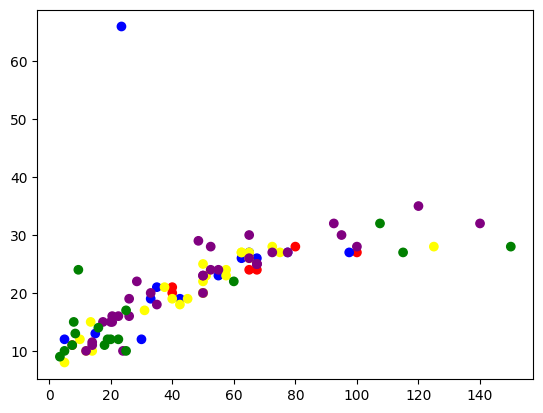

In [48]:
fig, ax = plt.subplots()
ax.scatter(x=whole_info_obey['avg_weight'], y=whole_info_obey['avg_height'], c=whole_info_obey['Classification'].map(color_dict))
plt.show()